# IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

from sklearn import metrics # evaluation of data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# READING DATA

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Credit card  Fraud Detection/fraudTrain.csv", index_col=0)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
test_data =pd.read_csv("/content/drive/MyDrive/CodSoft 2024/Credit card  Fraud Detection/fraudTest.csv", index_col=0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
train_data.shape , test_data.shape

((1048575, 22), (555719, 22))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop               

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

# Feature Selection

In [7]:
train_data.drop(columns=[ "trans_num", "street"], inplace= True)
train_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,1325376018,36.011293,-82.048315,0
1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1325376044,49.159047,-118.186462,0
2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,1325376051,43.150704,-112.154481,0
3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,12-01-1967,1325376076,47.034331,-112.561071,0
4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,10-03-2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,Annapolis,MD,21405,39.0305,-76.5515,92106,"Accountant, chartered certified",28-05-1943,1362931649,38.779464,-76.317042,0
1048571,10-03-2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,Hedrick,IA,52563,41.1826,-92.3097,1583,Geochemist,28-06-1999,1362931670,41.400318,-92.726724,0
1048572,10-03-2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,Louisville,KY,40202,38.2507,-85.7476,736284,Engineering geologist,02-04-1952,1362931711,37.293339,-84.798122,0
1048573,10-03-2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,West Sayville,NY,11796,40.7320,-73.1000,4056,Film/video editor,25-06-1990,1362931718,39.773077,-72.213209,0


In [8]:
test_data.drop(columns=[ "trans_num", "street"], inplace= True)
test_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,1388534364,44.470525,-117.080888,0


# DATA ANALYSICS

In [9]:
train_data.is_fraud.value_counts()

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [10]:
test_data.is_fraud.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [11]:
# df_processed = pd.get_dummies(data=train_data)
# df_processed

In [12]:
# df_processed_test= pd.get_dummies(data=test_data)
# df_processed_test

# LABEL ENCONDING

In [13]:
# encoding training data
encoder=LabelEncoder()

for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col]=encoder.fit_transform(train_data[col])

In [14]:
for col in test_data.columns:
    if test_data[col].dtype == object:
        test_data[col]=encoder.fit_transform(test_data[col])

In [15]:
train_data.shape ,test_data.shape

((1048575, 20), (555719, 20))

In [16]:
x_train=train_data.drop(columns='is_fraud')
y_train=train_data['is_fraud']


x_test=test_data.drop(columns='is_fraud')
y_test=test_data['is_fraud']

# BUILDING A MODEL

In [17]:
# build classification models

modelLR=LogisticRegression()
modelRF=RandomForestClassifier()
modelDT=DecisionTreeClassifier()

In [18]:
modelLR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
modelRF.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
predictionsLR=modelLR.predict(x_test)
predictionsRF=modelRF.predict(x_test)
predictionsDT=modelDT.predict(x_test)

In [22]:
cmLR=confusion_matrix(y_test,predictionsLR)
cmRF=confusion_matrix(y_test,predictionsRF)
cmDT=confusion_matrix(y_test,predictionsRF)

<Axes: >

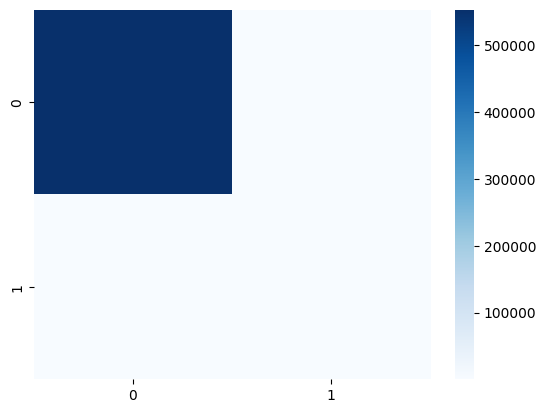

In [23]:
sns.heatmap(data=cmRF,cmap='Blues')

In [24]:
accuracyLR=accuracy_score(y_test,predictionsLR)
accuracyRF=accuracy_score(y_test,predictionsRF)
accuracyDT=accuracy_score(y_test,predictionsDT)

In [25]:
accuracyLR , accuracyRF , accuracyDT

(0.9961401355721147, 0.9971910264000331, 0.9944360369179387)

In [26]:
# prompt: accuracy for train data

# Predict on the training data
train_predictionsLR = modelLR.predict(x_train)
train_predictionsRF = modelRF.predict(x_train)
train_predictionsDT = modelDT.predict(x_train)

# Calculate training accuracy
train_accuracyLR = accuracy_score(y_train, train_predictionsLR)
train_accuracyRF = accuracy_score(y_train, train_predictionsRF)
train_accuracyDT = accuracy_score(y_train, train_predictionsDT)

print("Training Accuracy (Logistic Regression):", train_accuracyLR)
print("Training Accuracy (Random Forest):", train_accuracyRF)
print("Training Accuracy (Decision Tree):", train_accuracyDT)

Training Accuracy (Logistic Regression): 0.9942722265932337
Training Accuracy (Random Forest): 1.0
Training Accuracy (Decision Tree): 1.0


In [27]:
train_accuracyLR, train_accuracyRF, train_accuracyDT

(0.9942722265932337, 1.0, 1.0)

# CONCLUSION

In [28]:
""" Based on the results, Logistic Regression appears to be the most suitable model
for this credit card fraud detection task due to its good generalization performance."""

' Based on the results, Logistic Regression appears to be the most suitable model \nfor this credit card fraud detection task due to its good generalization performance.'